## 1. Data Pre-processing (15 Marks)
Read data and separate into test, train, and validation sets.
Implement necessary pre-processing steps, addressing missing data and outliers.
you can use shared notebook but make sure to change it if needed (data has some changes).

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('data/yield_prediction.csv', index_col=False)
df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,0,0.072,80.179,9.414,0,29.878,2.231,6,c
1,1,5.413,58.359,9.681,3,53.416,1.810,6,c
2,2,9.731,78.506,7.189,1,63.391,2.455,1,d
3,3,10.995,69.248,1.738,3,17.984,0.603,2,a
4,4,2.617,87.658,9.706,1,49.768,2.910,6,c


In [24]:
print(f"Missing values: \n{df.isnull().sum()}")
print(f"Number of rows: {df.shape[0]}")

Missing values: 
id                   0
water               42
uv                   0
area                 0
fertilizer_usage     0
yield                0
pesticides           0
region               0
categories           0
dtype: int64
Number of rows: 1000


In [25]:
df.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,958.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,6.668327,78.701995,8.098848,2.294000,58.758571,3.452301,3.039000
std,288.819436,2.842990,245.848978,2.692632,1.554986,24.563683,2.076921,1.883886
min,0.000000,0.072000,-2500.000000,0.263000,0.000000,2.843000,0.014000,0.000000
25%,249.750000,4.584750,66.493000,6.297000,1.000000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.700000,7.987500,3.000000,55.602500,3.275500,2.000000
75%,749.250000,8.758750,80.608250,9.900250,3.000000,73.645500,4.916000,5.000000
max,999.000000,18.100000,7400.620000,18.311000,5.000000,148.845000,9.532000,6.000000


In [26]:
fig = px.histogram(df, x="uv", title="UV Histogram")
fig2 = px.box(df, x="uv", title="UV Boxplot")
fig.show()
fig2.show()

In [27]:
fig = px.histogram(df, x="water", title="Water Histogram")
fig2 = px.box(df, x="water", title="Water Boxplot")
fig.show()
fig2.show()

In [28]:
fig = px.histogram(df, x="area", title="Area Histogram")
fig2 = px.box(df, x="area", title="Area Boxplot")
fig.show()
fig2.show()

In [29]:
fig = px.histogram(df, x="fertilizer_usage", title="Fertilizer Usage Histogram")
fig2 = px.box(df, x="fertilizer_usage", title="Fertilizer Usage Boxplot")
fig.show()
fig2.show()

In [30]:
fig = px.histogram(df, x="pesticides", title="Pesticides Histogram")
fig2 = px.box(df, x="pesticides", title="Pesticides Boxplot")
fig.show()
fig2.show()

In [31]:
fig = px.histogram(df, x="region", title="Region Histogram")
fig2 = px.box(df, x="region", title="Region Boxplot")
fig.show()
fig2.show()

##### After looking at the histograms and box plots of all numerical columns of the dataset. It was visually determined that the only column that have outliers is the "uv" column. Based on this observation. we defined outliers as follows: $$Outlier \ge C\sigma+M \text{ or } Outlier \le M - C\sigma$$ Where $C = 5$ and $\sigma$ is the standard deviation and $M$ is median.

In [32]:
# Replace NaN values Medians for a list of columns
def replace_nan_median(df, columns):
    for column in columns:
        median = df[column].median()
        df[column].fillna(median, inplace=True)

replace_nan_median(df, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
print(f"Missing values: \n{df.isnull().sum()}")

Missing values: 
id                  0
water               0
uv                  0
area                0
fertilizer_usage    0
yield               0
pesticides          0
region              0
categories          0
dtype: int64


C:\Users\jared\AppData\Local\Temp\ipykernel_11976\2372315948.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\jared\AppData\Local\Temp\ipykernel_11976\2372315948.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [33]:
C = 5
#Replace outliers with the median of a list of columns
def replace_outliers_median(df, columns):
    for column in columns:
        median = df[column].median()
        std = df[column].std()
        outliers = (df[column] > median + C * std) | (df[column] < median - C * std)
        df.loc[outliers, column] = median

replace_outliers_median(df, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
df.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,6.660249,73.948775,8.098848,2.294000,58.758571,3.452301,3.039000
std,288.819436,2.782853,9.932102,2.692632,1.554986,24.563683,2.076921,1.883886
min,0.000000,0.072000,45.264000,0.263000,0.000000,2.843000,0.014000,0.000000
25%,249.750000,4.695500,66.501250,6.297000,1.000000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.700000,7.987500,3.000000,55.602500,3.275500,2.000000
75%,749.250000,8.611000,80.566250,9.900250,3.000000,73.645500,4.916000,5.000000
max,999.000000,18.100000,106.310000,18.311000,5.000000,148.845000,9.532000,6.000000


In [34]:
fig = px.histogram(df, x="uv", title="Adjusted UV Histogram")
fig2 = px.box(df, x="uv", title="Adjusted UV Boxplot")
fig.show()
fig2.show()

In [35]:
def create_category_one_hot(row: pd.Series):
    categories = row['categories'].split(',')
    for category in categories:
        col_name = f"category_{category}"
        row[col_name] = 1
    return row

column_types = {
    'category_a': 'int',
    'category_c': 'int',
    'category_d': 'int',
}

df = df.apply(create_category_one_hot, axis=1)
df = df.fillna(0)
df.drop(columns=['categories'], inplace=True)
df = df.astype(column_types)

# Rearranging columns to have the target variable at the end
df = df[['uv', 'water', 'area', 'fertilizer_usage', 'pesticides', 'category_a', 'category_c', 'category_d', 'yield']]
df.head(n=5)

,uv,water,area,fertilizer_usage,pesticides,category_a,category_c,category_d,yield
0,80.179,0.072,9.414,0,2.231,0,1,0,29.878
1,58.359,5.413,9.681,3,1.810,0,1,0,53.416
2,78.506,9.731,7.189,1,2.455,0,0,1,63.391
3,69.248,10.995,1.738,3,0.603,1,0,0,17.984
4,87.658,2.617,9.706,1,2.910,0,1,0,49.768


In [36]:
X = df.drop('yield', axis=1)
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(n=5)
#Create a function that takes a dataframe and a list of columns and returns a new dataframe with the columns scaled using z-score normalization
def z_score_normalization(df, columns):
    for column in columns:
        mean = X_train[column].mean()
        std = X_train[column].std()
        df[column] = (df[column] - mean) / std

z_score_normalization(X_test, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
z_score_normalization(X_train, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# X_train.head(n=5)

## 2. Regression Tree Optimization (30 Marks)
Apply regression tree and tune parameters to prevent overfitting.
Implement post-pruning without Python libraries and compare it with results with pre-pruning and SKlearn post-pruning.
Discuss the effectiveness of each method in this dataset.

In [37]:
# Import libraries  

import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define a function for manul post-pruning

def post_prune(tree, X_val, y_val, node_id=0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == right_child:  # Leaf node
        return

    # Recursively prune children
    post_prune(tree, X_val, y_val, left_child)
    post_prune(tree, X_val, y_val, right_child)

    # Calculate error before pruning
    y_pred = tree.predict(X_val)
    mse_before = mean_squared_error(y_val, y_pred)

    # Store current tree state
    left_child_value = tree.value[left_child].copy()
    right_child_value = tree.value[right_child].copy()

    # Prune the tree
    tree.children_left[node_id] = -1
    tree.children_right[node_id] = -1

    # Calculate error after pruning
    y_pred = tree.predict(X_val)
    mse_after = mean_squared_error(y_val, y_pred)

    # If pruning worsens the error, revert the changes
    if mse_after > mse_before:
        tree.value[left_child] = left_child_value
        tree.value[right_child] = right_child_value
        tree.children_left[node_id] = left_child
        tree.children_right[node_id] = right_child

# Apply post-pruning to regression tree model
        
regression_tree_model = DecisionTreeRegressor(random_state = 0)
regression_tree_model.fit(X_train, y_train)
post_prune(regression_tree_model.tree_, X_test.astype(np.float32), y_test.astype(np.float32))
print(f"MSE of manually post-pruned tree: {mean_squared_error(y_test, regression_tree_model.predict(X_test))}")

MSE of manually post-pruned tree: 178.59395010166205


Minimum samples at any leaf node for the lowest MSE: 19
MSE: 233.9685142854124 

Minimum samples to split with the lowest MSE: 59
MSE: 227.52004373783078 

Maximum depth with the lowest MSE: 6
MSE: 231.7553123777433 

MSE with all 3 independantly optimized pre-pruning parameters implemented: 228.99585032163296


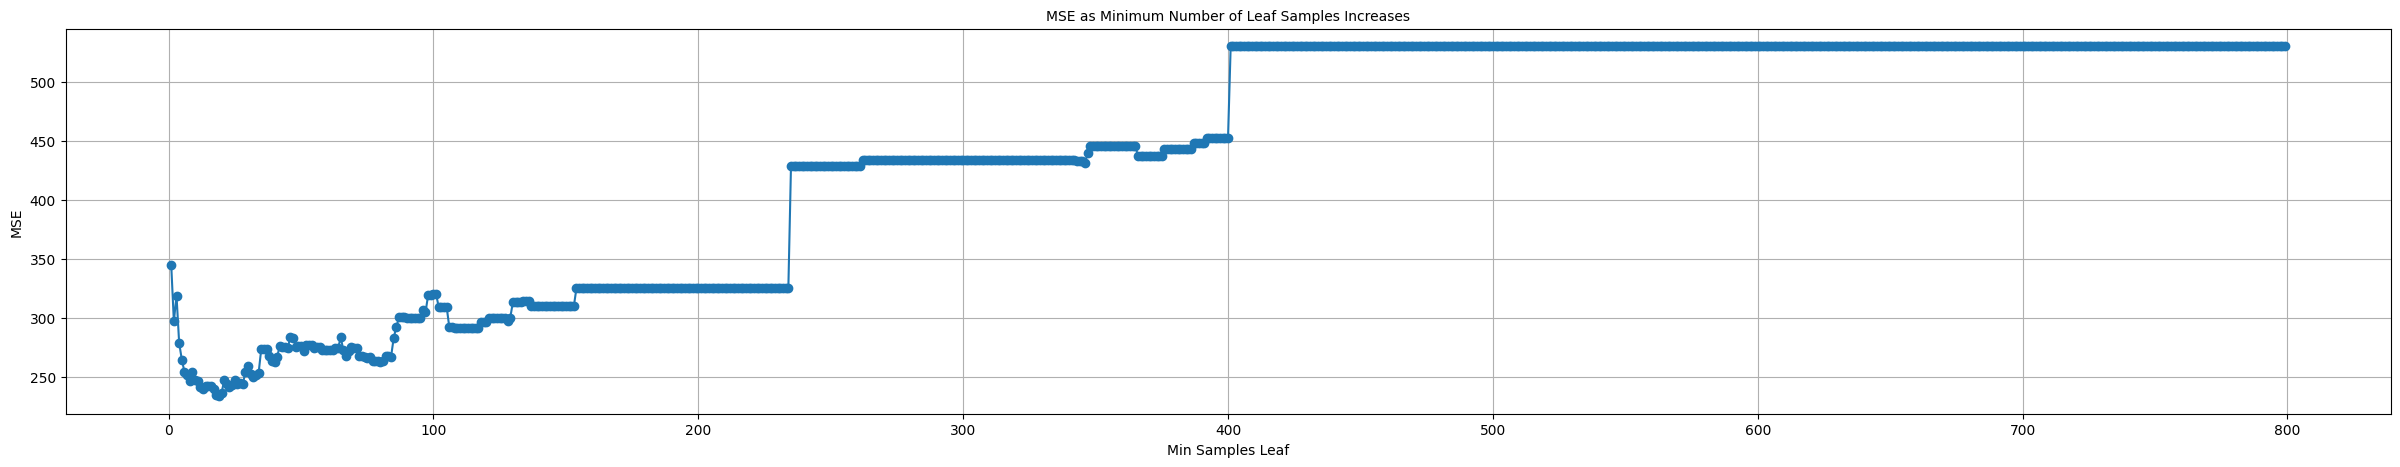

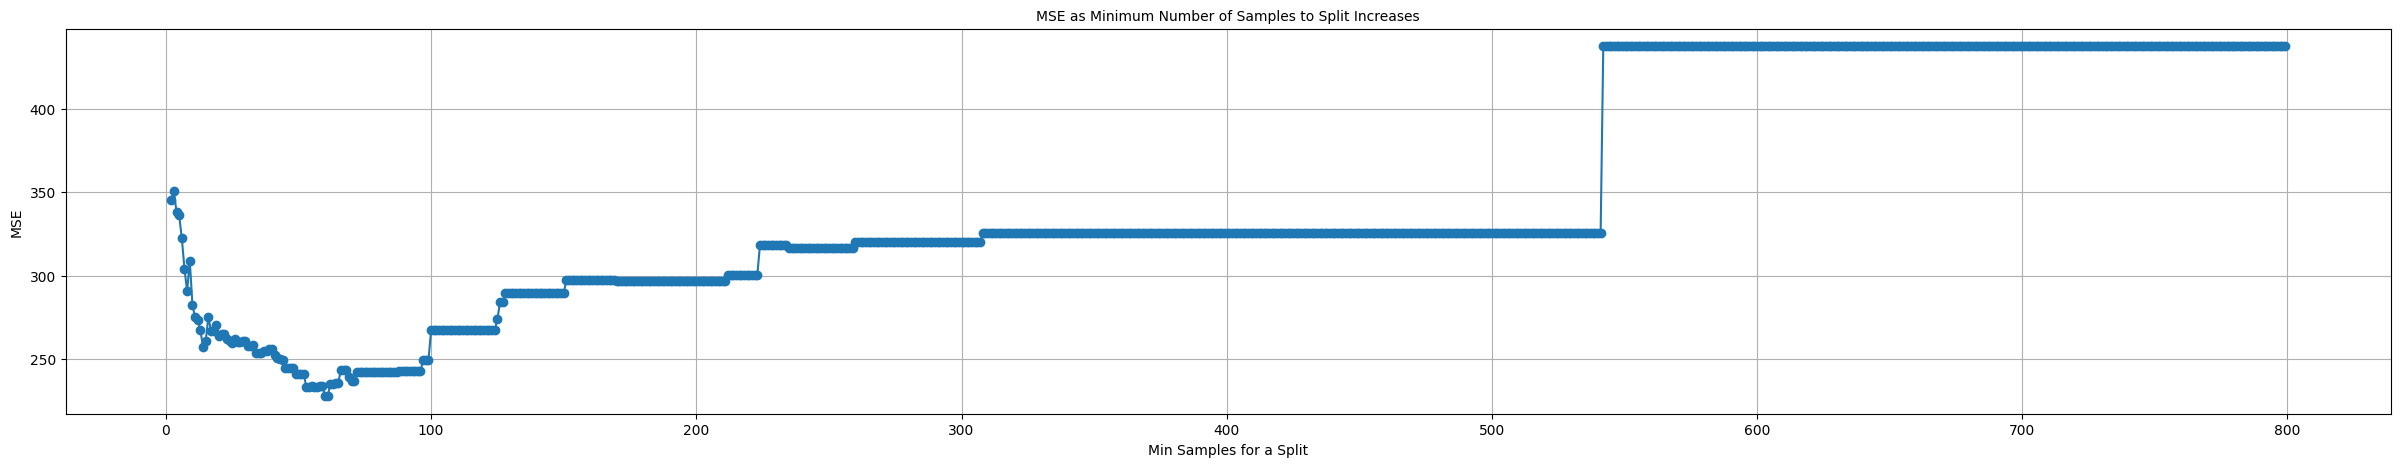

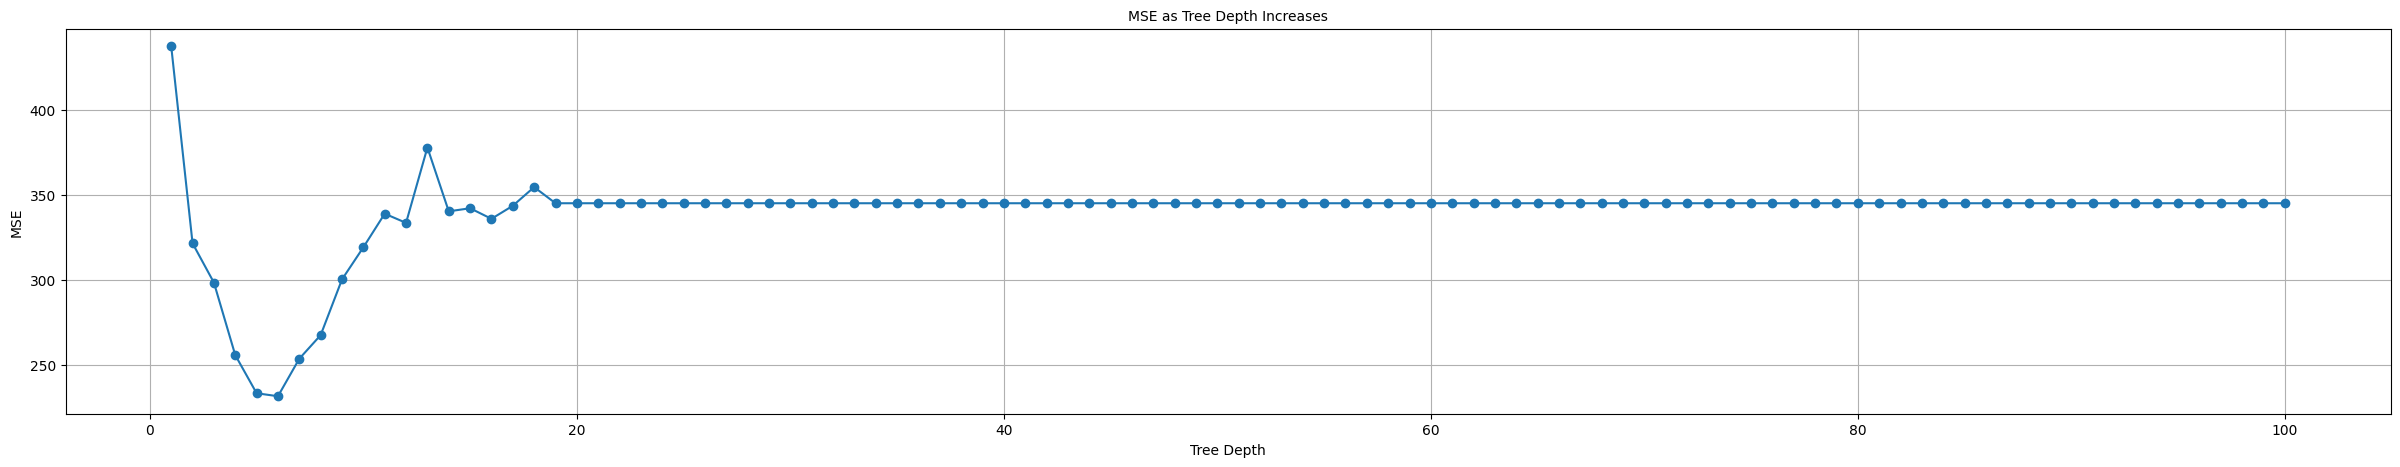

In [38]:
# Apply pre-pruning to prevent overfitting based on available regression tree attributes (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
# We know there are 800 datapoints in the training set that will end up at leaves and 8 features to split the data by - this defines limits for some of the parameters

mse_min_samples_leaf = []
leaves = np.arange(1, 800) 

for i in range(799):

    regression_tree_model = DecisionTreeRegressor(min_samples_leaf=i+1, random_state = 0)
    regression_tree_model.fit(X_train, y_train)
    y_estimations = regression_tree_model.predict(X_test)
    mse_min_samples_leaf.append(mean_squared_error(y_test, y_estimations))


plt.figure(figsize=(30,5))
plt.plot(leaves, mse_min_samples_leaf, marker='o')
plt.title("MSE as Minimum Number of Leaf Samples Increases", size = 10) 
plt.xlabel("Min Samples Leaf", size = 10) 
plt.ylabel("MSE", size = 10) 
plt.grid(True)
print(f"Minimum samples at any leaf node for the lowest MSE: {mse_min_samples_leaf.index(min(mse_min_samples_leaf))+1}")
print(f"MSE: {min(mse_min_samples_leaf)} \n")

mse_min_samples_split = []
splits = np.arange(2, 800) 

for i in range(798):

    regression_tree_model = DecisionTreeRegressor(min_samples_split=i+2, random_state = 0)
    regression_tree_model.fit(X_train, y_train)
    y_estimations = regression_tree_model.predict(X_test)
    mse_min_samples_split.append(mean_squared_error(y_test, y_estimations))


plt.figure(figsize=(30,5))
plt.plot(splits, mse_min_samples_split, marker='o')
plt.title("MSE as Minimum Number of Samples to Split Increases", size = 10) 
plt.xlabel("Min Samples for a Split", size = 10) 
plt.ylabel("MSE", size = 10) 
plt.grid(True)
print(f"Minimum samples to split with the lowest MSE: {mse_min_samples_split.index(min(mse_min_samples_split))+1}")
print(f"MSE: {min(mse_min_samples_split)} \n")

mse_max_depth = []
depths = np.arange(1, 101)

for i in range(100):

    regression_tree_model = DecisionTreeRegressor(max_depth=i+1, random_state = 0)
    regression_tree_model.fit(X_train, y_train)
    y_estimations = regression_tree_model.predict(X_test)
    mse_max_depth.append(mean_squared_error(y_test, y_estimations))

plt.figure(figsize=(30,5))
plt.plot(depths, mse_max_depth, marker='o')
plt.title("MSE as Tree Depth Increases", size = 10) 
plt.xlabel("Tree Depth", size = 10) 
plt.ylabel("MSE", size = 10) 
plt.grid(True)
print(f"Maximum depth with the lowest MSE: {mse_max_depth.index(min(mse_max_depth))+1}")
print(f"MSE: {min(mse_max_depth)} \n")
#regression_tree_model.get_depth()

regression_tree_model = DecisionTreeRegressor(min_samples_leaf=mse_min_samples_leaf.index(min(mse_min_samples_leaf))+1, min_samples_split= mse_min_samples_split.index(min(mse_min_samples_split))+1, max_depth = mse_max_depth.index(min(mse_max_depth))+1)
regression_tree_model.fit(X_train, y_train)
y_estimations = regression_tree_model.predict(X_test)
print(f"MSE with all 3 independantly optimized pre-pruning parameters implemented: {mean_squared_error(y_test, y_estimations)}")

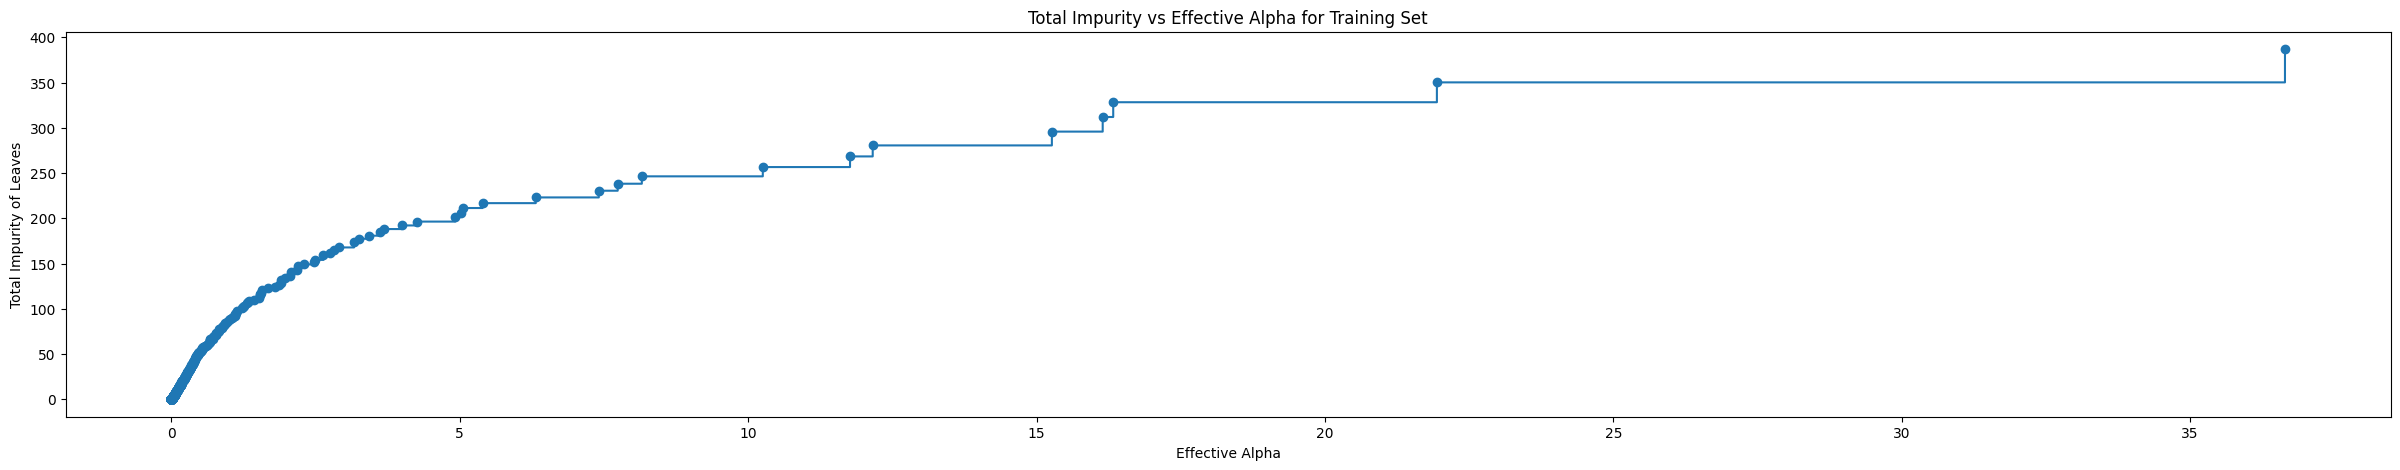

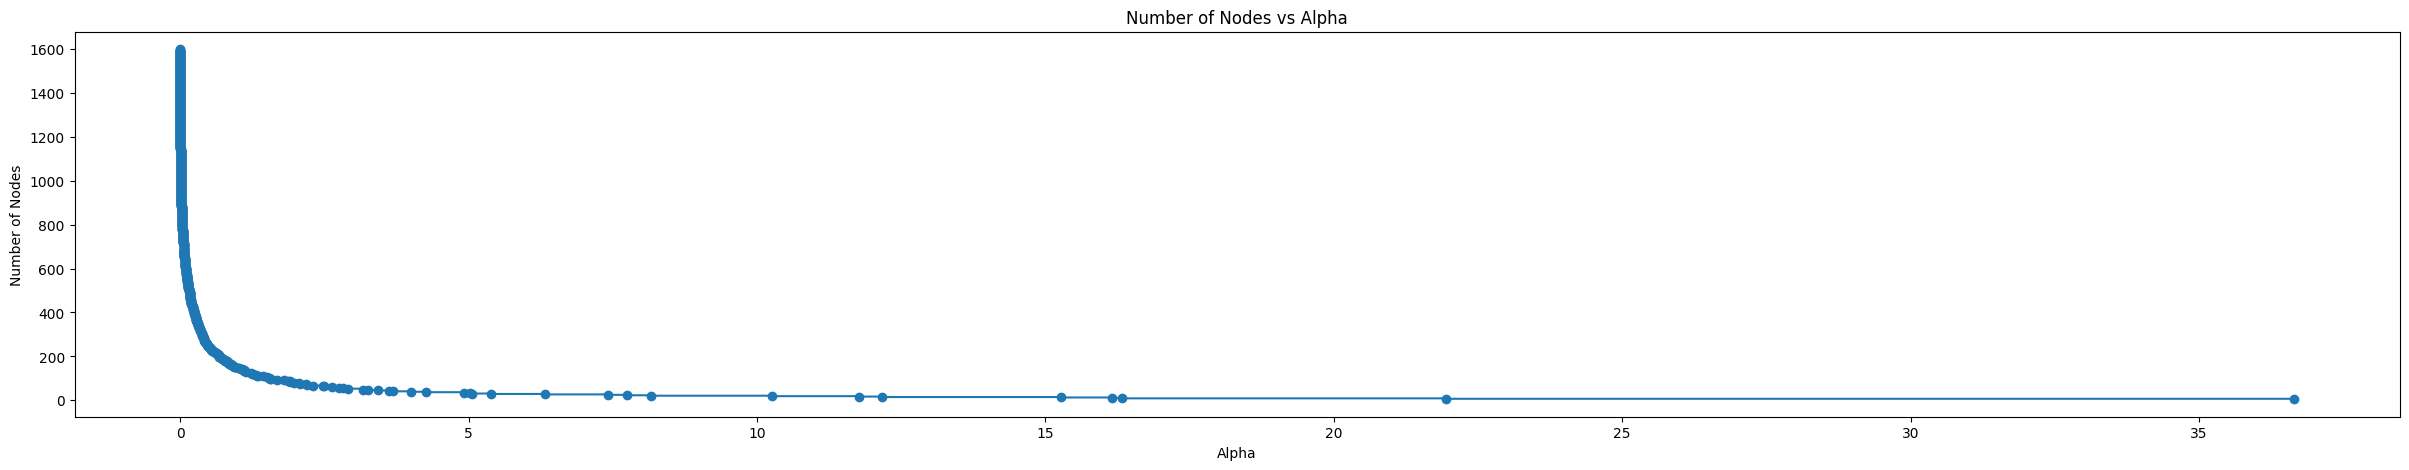

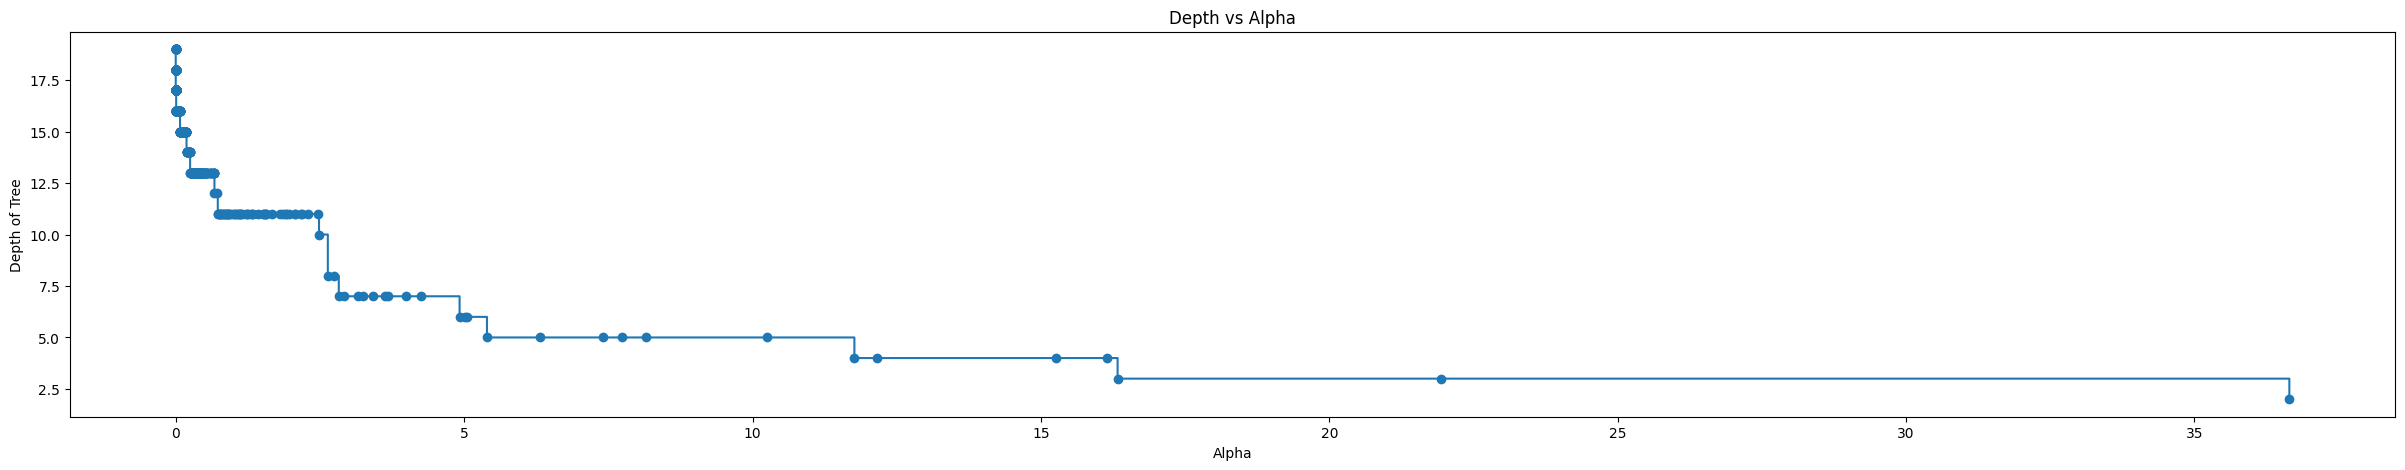

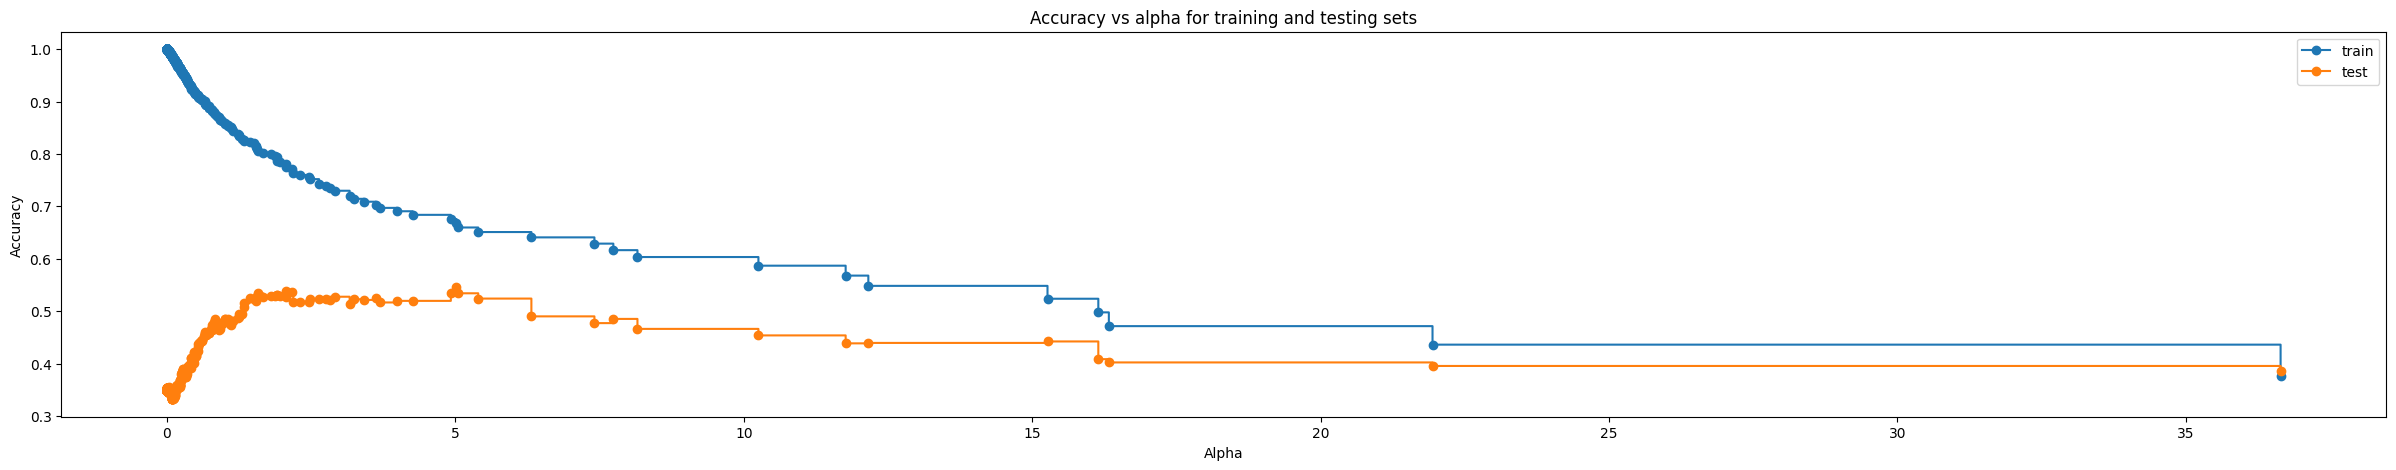

Alpha value corrusponding to the maximum score: 5.0186385086839
MSE for Sklearn post-pruned tree: 240.75111958258913
Sklearn post-pruned tree depth: 6


In [39]:
# Apply post-pruning using Sklearn's cost complexity pruning based on the documentation's example (https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

# This pruning technique is parameterized by the cost complexity parameter, ccp_alpha 
# Greater values of ccp_alpha increase the number of nodes pruned
# Nodes with the smallest effective alpha are pruned first
# 'DecisionTreeClassifier.cost_complexity_pruning_path' returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
# As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves

clf = DecisionTreeRegressor(random_state=0)                 #random state set to 0 here for deterministic results (features are not randomly permuted at each split)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(30,5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")

# Train a decision tree using the effective alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Show that the number of nodes and tree depth decreases as alpha increases

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(30,5))
plt.plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Number of Nodes")
plt.title("Number of Nodes vs Alpha")

plt.figure(figsize=(30,5))
plt.plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Depth of Tree")
plt.title("Depth vs Alpha")

# When ccp_alpha is set to 0, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy
# As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better
# Find the alpha corrusponding to the maximum test accuracy

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(30,5))
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

print(f"Alpha value corrusponding to the maximum score: {ccp_alphas[test_scores.index(max(test_scores))]}")

# Use this alpha value to train the regression tree, test it with the test set, and find the mean squared error

sklearn_tree_model = DecisionTreeRegressor(random_state=0, ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))])
sklearn_tree_model.fit(X_train, y_train)
y_estimations_sklearn = sklearn_tree_model.predict(X_test)

print(f"MSE for Sklearn post-pruned tree: {mean_squared_error(y_test, y_estimations_sklearn)}")
print(f"Sklearn post-pruned tree depth: {sklearn_tree_model.get_depth()}")

## 3. Comparison with Random Forest and SVR (25 Marks)
Optimize parameters for Decision Trees (DTs), Random Forest, and Support Vector Regression (SVR).
Compare results using sutable metrics.
Discuss the strengths and weaknesses of each method.

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# (Decision Tree) parameters to optimize
# criterion using mean squared error
# max_depth represents the maximum depth, from Task 2 (Regression Tree), 6 was the best
# min_samples_split represents the sample to split, from Task 2 (Regression Tree), 59 was the best
# min_samples_leaf represents the samples at each leaf node, from Task 2 (Regression Tree), 19 was the best
decision_tree_para = {'criterion': ['squared_error', 'absolute_error'],'max_depth': [None, 3, 6, 9, 12],'min_samples_split': [20, 30, 40, 50, 60, 70, 80],'min_samples_leaf': [5, 10, 15, 20, 25, 30]}

# (Random Forest) parameters to optimize
# n_estimators represents the number of decision trees in the forest
# max_features represents the number of features to consider when looking for the best split
# min_samples_split represents the sample to split, from Task 2 (Regression Tree), 59 was the best
# min_samples_leaf represents the samples at each leaf node, from Task 2 (Regression Tree), 19 was the best
random_forest_para = {'n_estimators': [10, 50, 100, 150],'max_features': [None, 'sqrt', 'log2'],'min_samples_split': [20, 30, 40, 50, 60, 70, 80],'min_samples_leaf': [5, 10, 15, 20, 25, 30]}

# (Support Vector Regression [SVR]) parameters to optimize
# kernel is the kernel type to be used
# C is the regularization strength parameter, smaller C is a smoother decision boundary, larger is a better training data fit
# epsilon is the width parameter for the margin of tolerance, smaller is tighter fit to training data, larger is more tolerance
# gamma is the kernel coefficient, smaller gamma has larger radius of influence and smoother boundary, larger has a more sensitive decision boundary
SVR_para = {'kernel': ['linear', 'poly', 'rbf'],'C': [0.1, 1, 10, 100],'epsilon': [0.001, 0.01, 0.1, 1],'gamma': ['scale', 'auto']}

# use grid search to find the best parameter combinations, it searches exhaustively including using cross-validation
decision_tree_search = GridSearchCV(DecisionTreeRegressor(), decision_tree_para, cv = 5)

# use randomized search to find the best parameter combinations, it searchs a random subset of combinations
# using this for efficiency since random forest is much larger than a single decision tree
random_forest_search = RandomizedSearchCV(RandomForestRegressor(), random_forest_para, n_iter = 100, cv = 5)

# as with decision trees use grid search to find the best parameter combinations, it searches exhaustively including using cross-validation
SVR_search = GridSearchCV(SVR(), SVR_para, cv = 5)

# fit the models to the data set
decision_tree_search.fit(X_train, y_train)
random_forest_search.fit(X_train, y_train)
SVR_search.fit(X_train, y_train)

# get and print the optimized parameters
print("Optimized parameters for Decision Tree  :", decision_tree_search.best_params_)
print("Optimized parameters for Random Forest  :", random_forest_search.best_params_)
print("Optimized parameters for SVR            :", SVR_search.best_params_)

# refit the models with the optimized parameters
decision_tree_opt_model = decision_tree_search.best_estimator_
decision_tree_opt_model.fit(X_train, y_train)

random_forest_opt_model = random_forest_search.best_estimator_
random_forest_opt_model.fit(X_train, y_train)

SVR_opt_model = SVR_search.best_estimator_
SVR_opt_model.fit(X_train, y_train)

# evaluate the three optimized models on test data
decision_tree_score = decision_tree_opt_model.score(X_test, y_test)
random_forest_score = random_forest_opt_model.score(X_test, y_test)
SVR_score = SVR_opt_model.score(X_test, y_test)

# print score to compare results
print("Score for Decision Tree  :", decision_tree_score)
print("Score for Random Forest  :", random_forest_score)
print("Score for SVR            :", SVR_score)

# Discussion of strengths and weaknesses of each method
print("The decision trees runs very quickly and can be perfectly tuned using the grid search algorithm, however, it lacks accuracy due to it being quick and computationally cheap")
print("The random forests runs very slowly as it is doing the decision trees multple times and cannot be perfectly tuned because of its computational cost, due to this the random search algorithm was used to optimize, however, it provides great accuracy")
print("The SVR runs fairly quick and can be perfectly tuned using the grid search algorithm and it also produced the best results, showing that it is a better algorithm than tree search for this dataset")

Optimized parameters for Decision Tree  : {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 30}
Optimized parameters for Random Forest  : {'n_estimators': 150, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': None}
Optimized parameters for SVR            : {'C': 10, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Score for Decision Tree  : 0.48527749005722787
Score for Random Forest  : 0.652726470886176
Score for SVR            : 0.6768015801961653
The decision trees runs very quickly and can be perfectly tuned using the grid search algorithm, however, it lacks accuracy due to it being quick and computationally cheap
The random forests runs very slowly as it is doing the decision trees multple times and cannot be perfectly tuned because of its computational cost, due to this the random search algorithm was used to optimize, however, it provides great accuracy
The SVR runs fairly quick and can be perfectly tuned using the grid 

## 4. Classification Task (10 Marks)
Add a threshold to the label column for a classification task.
Assign classes: 20% lowest yield per hectare as "low" and 80% as "high."
Apply SVM, DTs, and optimize parameters then compare them with suitable classification metrics.

## 5. Regression Tree as a Classifier (20-30 Marks)
Take the best regression tree from question 2.
Evaluate it as a classification problem following question 4 criteria.
Perform threshold analysis ( like ROC curve) to find the optimal threshold.
Compare the tree with optimal threshold with DTs from question 4. When comparing the results with Decision Trees (DTs) from question 4, consider the scenario where the underlying data is originally regression-based, but the task at hand requires a binary classification of 'yes' and 'no.' Discuss the implications of using regression labels directly versus thresholding them for classification purposes. Provide detailed insights into why one approach may be preferred over the other

# Submit a PDF report.
# Include a Google Colab link at the top of the report.
# Ensure accessibility to the Colab link for everyone.
# Follow these steps, keeping the analysis clear and straightforward, to successfully complete SYDE 522 Assignment 2.